<h1><center> Projeto #1 - Análise Exploratória de Dados </center></h1>

1) (5%) Qual a base escolhida e qual seu interesse nela? <br>
Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. <br>

Base com taxas de suicídio no mundo de 1986 - 2016 <br>
Objetivo: Realizar análise de taxas de suicídios em cada país x idade x geração <br> <br>
link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


2) (5%) Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo). <br>
GDP = PIB = PRODUTO INTERNO BRUTO - indicador de economia <br>
Identificação da variável a serem trabalhadas <br>
Classificação das variáveis como: contínua ou discreta. <br>

COUNTRY = PAIS <BR>
YEAR = ANO <BR>
SEX = SEXO <BR>
AGE = IDADE <BR>
SUICIDES_NO = SUICIDIOS <BR>
POPULATION = POPULAÇÃO <BR>
SUICIDES/100K POP = SUICIDIOS A CADA 100.000 PESSOAS NO PAIS / ANO / SEXO / IDADE <BR>
COUNTRY-YEAR = CONCATENADO PAIS / ANO <BR>
HDI FOR YEAR = asdfdsf <BR>
GDP FOR YEAR  = PIB ANUAL <BR>
GDP PER CAPITA  = PIB PER CAPITA <BR>
GENERATION = GERAÇÃO <BR>



3) (15%) Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?
Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):

Checagem se os valores estão dentro de um limite permitido ou razoável.
Tratamento de valores ausentes por eliminação ou substituição.
Conversão do tipo de dados.

In [2]:
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import accuracy_score

In [3]:
#leitura da base de dados
df = pd.read_csv("master.csv")


In [4]:
#QUAL O TAMANHO DA NOSSA BASE?
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (27820, 12)


In [5]:
#FEATURES DA BASE
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
# tipos dos campos
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [7]:
#verificando os 5 primeiros registros da base e cabeçalhos
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
df.isnull().sum()
#VERIFICA LINHAS QUE POSSUEM REGISTROS NULOS

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
#REALIZANDO SANEAMENTO DOS CABEÇALHOS

df.drop(columns=['HDI for year'], inplace=True)
df.drop(columns=['country-year'], inplace=True)
#EXCLUIR LINHA HDI FOR YEAR POR CONTA DA QUANTIDADE DE VALORES NULOS
#EXCLUIR LINHA COUNTRY-YEAR, POIS JÁ TENHO ELAS COMO FEATURES DIFERENTES
#SUICIDES_NO = NUMEROS DE SUICIDOS
#FALTA TROCAR NOMES DAS COLUNAS...

df.head()
#LISTANDO OS DADOS

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [10]:
#  VERIFICAR TIPOS DE DADOS DE CADA FEATURE
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [39]:
#CONVERTENDO VARIAVEL GDP_PER_CAPITA PARA FLOAT 


4) (60%) Nos blocos seguintes construa análises que vão justificar suas conclusões. <br>
4.1) (20%) Análise 1 - Distribuição dos valores para cada uma das variáveis <br>
Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+? <br>

Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver. <br>

In [12]:
# % DE SUICIDIOS POR FAIXA DE IDADE
df['age'].value_counts() / df.shape[0] * 100

35-54 years    16.685838
55-74 years    16.685838
25-34 years    16.685838
15-24 years    16.685838
75+ years      16.685838
5-14 years     16.570812
Name: age, dtype: float64

In [13]:
# OU ASSIM % DE SUICIDIOS POR FAIXA DE IDADE
df['age'].value_counts() / df['age'].count() * 100

35-54 years    16.685838
55-74 years    16.685838
25-34 years    16.685838
15-24 years    16.685838
75+ years      16.685838
5-14 years     16.570812
Name: age, dtype: float64

In [ ]:
#montar grafico com os % .... de suicidio


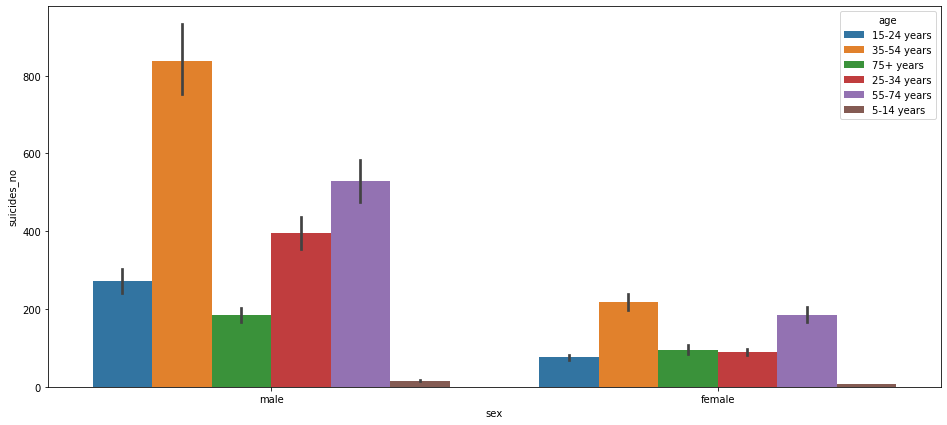

In [14]:
plt.figure(figsize=(16,7))
### Suicídos por sexo x idade
bar_idade1 = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

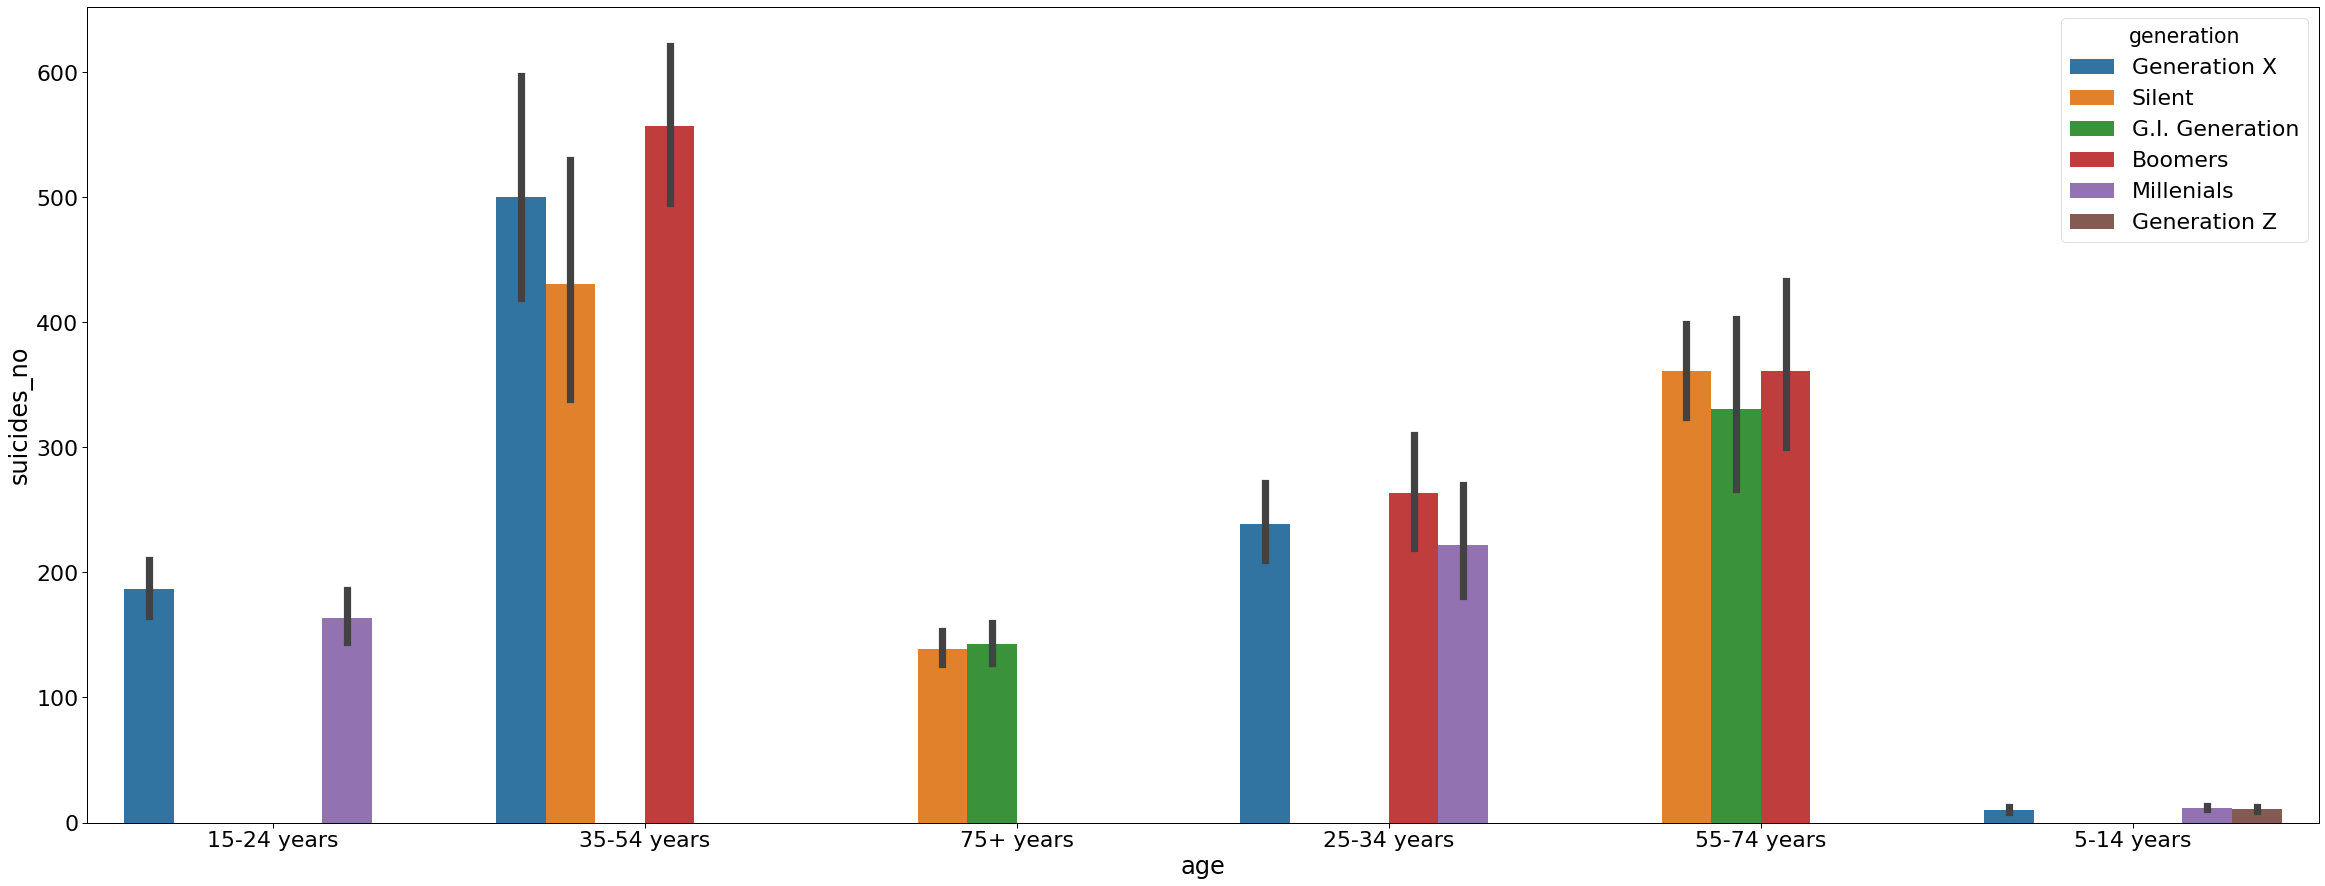

In [22]:
plt.figure(figsize=(40,15))
### Suicídos por idade x geração
bar_idade2 = sns.barplot(x = 'age', y = 'suicides_no', hue = 'generation',data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

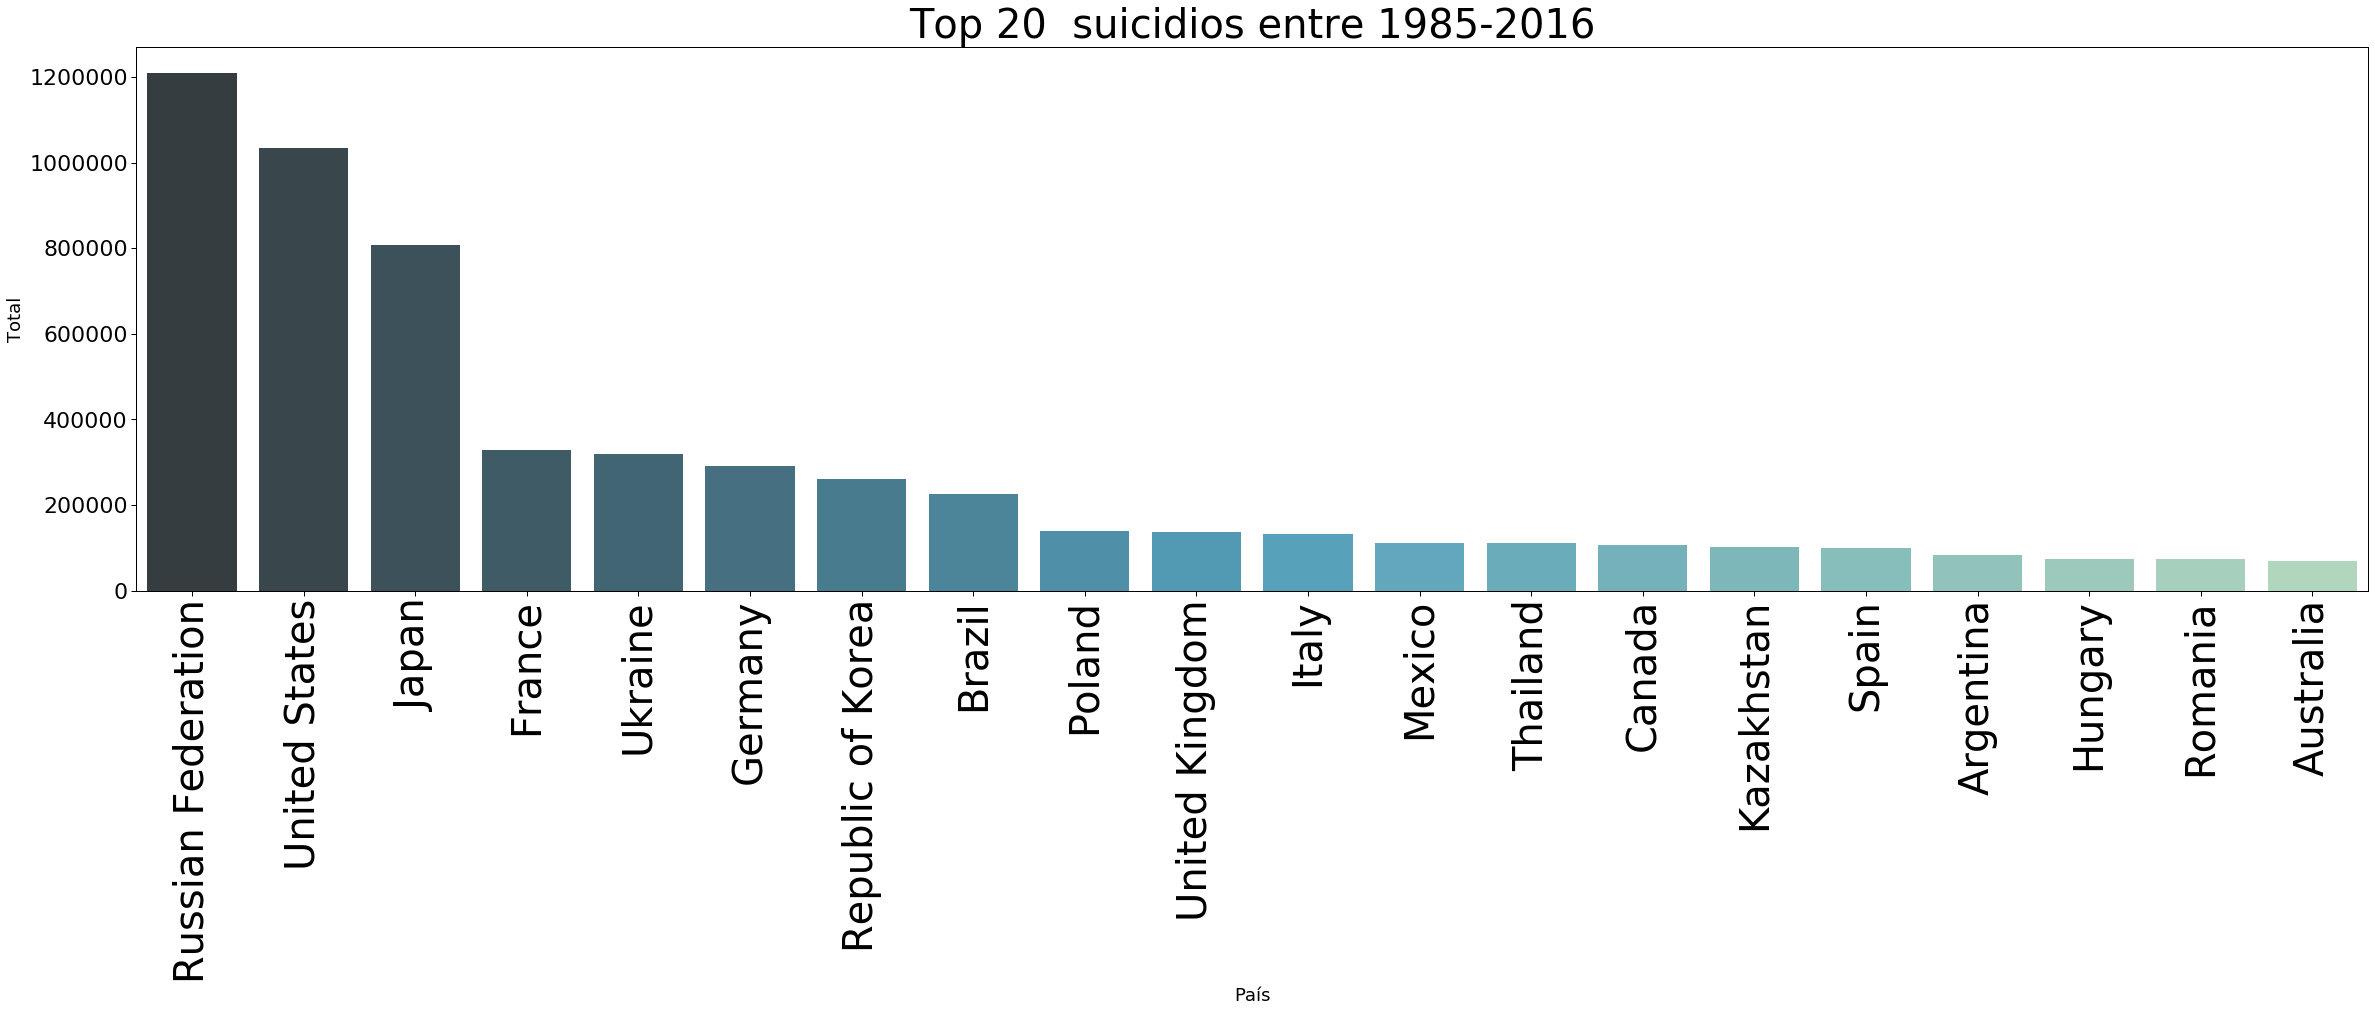

In [29]:
#total suicidios entre 1985 e 2016
plt.figure(figsize=(40,10))
new_df = pd.DataFrame(df.groupby('country').sum()['suicides_no'].sort_values(ascending=False).reset_index())
analise_total = new_df.head(20) 
#BUSCANDO OS 20 REGISTROS DE PAISES
#plt.figure(figsize=(40,15))
figure = sns.barplot(x = 'country', y = 'suicides_no', data = analise_total, palette="GnBu_d")
figure.set_title('Top 20  suicidios entre 1985-2016', {'fontsize': 40})
figure.set_xlabel('País', {'fontsize': 18})
figure.set_ylabel('Total', {'fontsize': 18})

plt.rcParams["xtick.labelsize"] = 20
plt.xticks(rotation= 90)

Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.

In [16]:
# % genero
df['sex'].value_counts() / df['sex'].count() * 100

male      50.0
female    50.0
Name: sex, dtype: float64

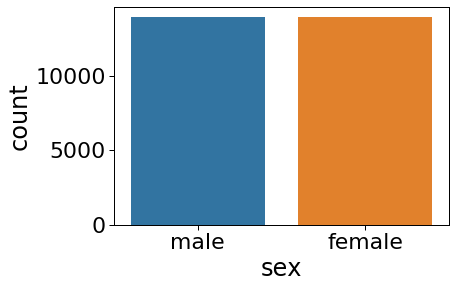

In [17]:
#REGISTROS POR SEXO
y = df['sex']

sns.set_context("paper", 2.5, {"lines.linewidth":4})
sns.countplot(y,label='QTDE')

4.2) (20%) Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".

In [ ]:
4.3) (20%) Análise 3 - Correlação entre variáveis
O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.

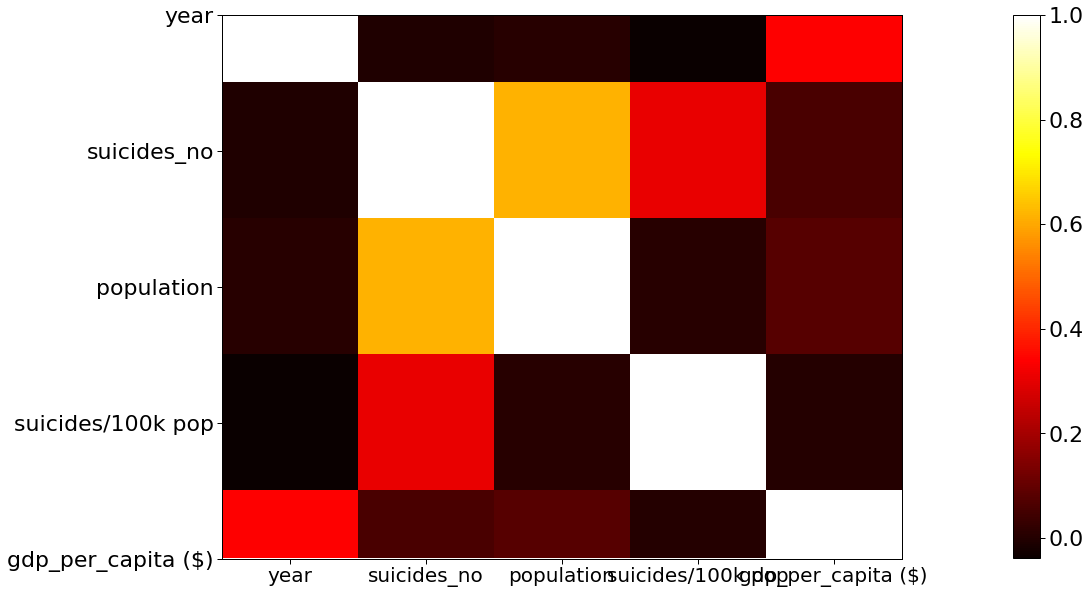

In [48]:
corre = df.corr()
plt.figure(figsize=(40,10))
plt.imshow(corre, cmap='hot', interpolation='none')
plt.colorbar()   
plt.xticks(range(len(corre)), corre.columns)  
plt.yticks(range(len(corre)), corre.columns);  
plt.savefig("correl.png")  
plt.show()  

#CONCLUSAO <br>
base de dados com quantidades de suicidos no mundo. <br> A cada ano a taxa de suicídios aumenta.
<BR>
sendo que nos paises desenvolvidos isto ocorre em uma quantidade bem maior do que nos demais. <br>
sendo que a maioria são homens e na faixa de 35-54 anos <br>

